 - Taller 2
 - Estudiante: Valeria Esperanza Bravo Saines

CASO 8 – LA FUGA DORADA: Cómo salvar a los clientes valiosos antes de que cierren a su cuenta
El banco BankUnity quiere predecir qué clientes van a cerrar su cuenta para poder retenerlos antes de que se vayan.

Objetivo:
Construir un modelo predictivo explicable para predecir cerrara_cuenta, evaluar métricas, 
simular escenarios, y responder preguntas estratégicas para negocio.


In [6]:
import pycaret
print(pycaret.__version__)

3.3.2


In [ ]:
#IMPORTAMOS LAS LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings('ignore')

from pycaret.classification import *
from sklearn.metrics import roc_curve

In [8]:
#CARGAMOS EL DATASET
df = pd.read_csv('taller2_MLE.csv')

In [5]:
df.head()

,edad,segmento,saldo_total,numero_productos,visitas_app_mes,usa_web,usa_tarjeta_credito,reclamos_6m,satisfaccion_encuesta,tasa_credito_personal,rango_ingresos,region,cerrara_cuenta
0,48,Preferente,43791.80,5,11,0,1,1,4.2,36.82,Medio,Sierra,0
1,36,Estándar,17940.87,1,7,0,1,0,2.2,39.78,Muy Alto,Selva,0
2,48,Estándar,9308.09,4,3,0,1,1,1.0,28.36,Medio,Sierra,1
3,30,Estándar,709.76,5,5,1,1,0,5.0,45.73,Bajo,Selva,0
4,74,Preferente,20471.46,1,4,0,0,1,3.1,39.19,Medio,Sierra,0


In [ ]:
print("Dimensiones del dataset:", df.shape)
print("Tipos de datos:")
print(df.dtypes)

Dimensiones del dataset: (5000, 13)

Tipos de datos:
edad                       int64
segmento                  object
saldo_total              float64
numero_productos           int64
visitas_app_mes            int64
usa_web                    int64
usa_tarjeta_credito        int64
reclamos_6m                int64
satisfaccion_encuesta    float64
tasa_credito_personal    float64
rango_ingresos            object
region                    object
cerrara_cuenta             int64
dtype: object


In [12]:
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
edad                     0
segmento                 0
saldo_total              0
numero_productos         0
visitas_app_mes          0
usa_web                  0
usa_tarjeta_credito      0
reclamos_6m              0
satisfaccion_encuesta    0
tasa_credito_personal    0
rango_ingresos           0
region                   0
cerrara_cuenta           0
dtype: int64


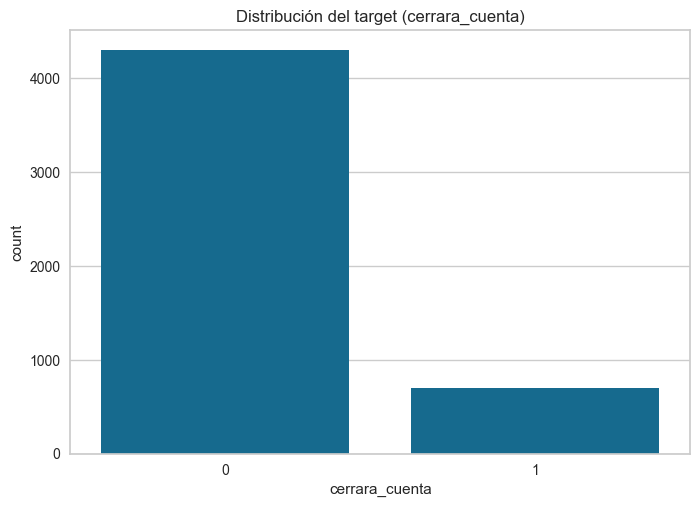

In [13]:
sns.countplot(x='cerrara_cuenta', data=df)
plt.title('Distribución del target (cerrara_cuenta)')
plt.show()

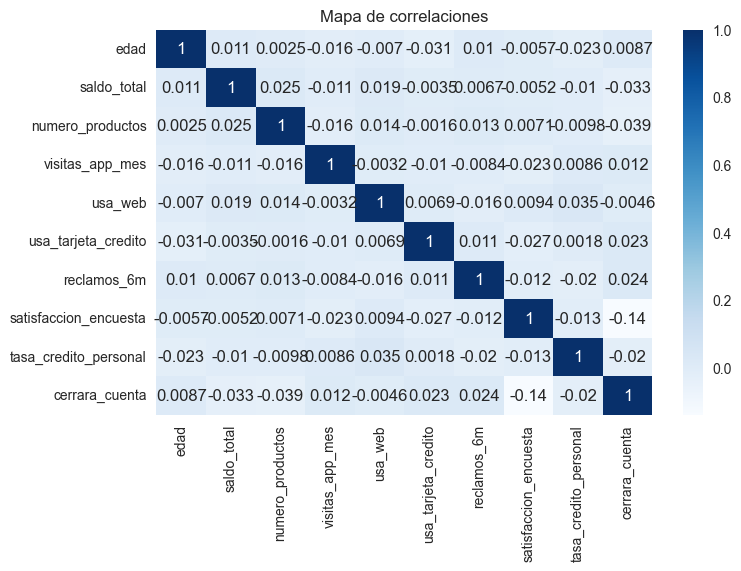

In [14]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title('Mapa de correlaciones')
plt.show()

In [10]:
# Setup() — definir el dataset y los parámetros
clf = setup(
    data=df,
    target='cerrara_cuenta',
    session_id=123,
    normalize=True,
    fix_imbalance=True,
    categorical_features=['segmento', 'rango_ingresos', 'region']
)

,Description,Value
0,Session id,123
1,Target,cerrara_cuenta
2,Target type,Binary
3,Original data shape,"(5000, 13)"
4,Transformed data shape,"(7518, 20)"
5,Transformed train set shape,"(6018, 20)"
6,Transformed test set shape,"(1500, 20)"
7,Numeric features,9
8,Categorical features,3
9,Preprocess,True


In [15]:
#2. Compare_models(): Comparar multiples modelos y los rankear
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.8597,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0240
ada,Ada Boost Classifier,0.8583,0.5949,0.0020,0.0500,0.0038,-0.0000,-0.0005,0.0990
gbc,Gradient Boosting Classifier,0.8577,0.5890,0.0000,0.0000,0.0000,-0.0039,-0.0112,0.3130
rf,Random Forest Classifier,0.8546,0.5670,0.0020,0.0333,0.0038,-0.0071,-0.0198,0.1680
et,Extra Trees Classifier,0.8529,0.5326,0.0102,0.1050,0.0186,0.0008,-0.0014,0.1310
lightgbm,Light Gradient Boosting Machine,0.8529,0.5611,0.0142,0.2519,0.0263,0.0066,0.0201,0.2860
dt,Decision Tree Classifier,0.7386,0.5183,0.2120,0.1628,0.1832,0.0313,0.0320,0.0440
knn,K Neighbors Classifier,0.6420,0.5020,0.2973,0.1379,0.1882,-0.0036,-0.0037,0.4800
lr,Logistic Regression,0.5843,0.6170,0.5766,0.1850,0.2799,0.0859,0.1136,3.7720
ridge,Ridge Classifier,0.5823,0.6172,0.5807,0.1850,0.2804,0.0861,0.1143,0.0260


In [16]:
#guardamos los resulatdo en un excel
results = pull()
results.to_csv('resultados_modelos.csv', index=False, sep=';')

In [17]:
best_by_auc = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.5823,0.6172,0.5807,0.1850,0.2804,0.0861,0.1143,0.0560
lda,Linear Discriminant Analysis,0.5823,0.6172,0.5807,0.1850,0.2804,0.0861,0.1143,0.0660
lr,Logistic Regression,0.5843,0.6170,0.5766,0.1850,0.2799,0.0859,0.1136,4.4410
ada,Ada Boost Classifier,0.8583,0.5949,0.0020,0.0500,0.0038,-0.0000,-0.0005,0.2170
svm,SVM - Linear Kernel,0.5374,0.5934,0.6051,0.1718,0.2671,0.0631,0.0918,0.0580
gbc,Gradient Boosting Classifier,0.8577,0.5890,0.0000,0.0000,0.0000,-0.0039,-0.0112,0.5440
nb,Naive Bayes,0.5531,0.5819,0.5725,0.1718,0.2642,0.0618,0.0853,0.0500
rf,Random Forest Classifier,0.8546,0.5670,0.0020,0.0333,0.0038,-0.0071,-0.0198,0.3610
lightgbm,Light Gradient Boosting Machine,0.8529,0.5611,0.0142,0.2519,0.0263,0.0066,0.0201,0.4460
qda,Quadratic Discriminant Analysis,0.5280,0.5363,0.5218,0.1532,0.2359,0.0254,0.0355,0.0600


Se escogío el modelo Ridge Classifier porque obtuvo el mayor AUC (0.6172), lo que indica una mejor capacidad para distinguir entre clientes que cierran o no su cuenta.

In [18]:
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5800,0.6135,0.6327,0.1938,0.2967,0.1048,0.1422
1,0.5229,0.6102,0.6122,0.1685,0.2643,0.0573,0.0837
2,0.6029,0.6801,0.6735,0.2115,0.3220,0.1384,0.1849
3,0.6143,0.6013,0.5510,0.1929,0.2857,0.0988,0.1244
4,0.5743,0.6131,0.5306,0.1711,0.2587,0.0596,0.0784
5,0.5971,0.5948,0.5714,0.1892,0.2843,0.0936,0.1213
6,0.5714,0.5890,0.5510,0.1742,0.2647,0.0660,0.0879
7,0.5857,0.5904,0.5510,0.1800,0.2714,0.0764,0.0998
8,0.5829,0.6603,0.6531,0.1988,0.3048,0.1147,0.1563


In [19]:
#4. Tune_model(): Ajuste automático de hiperparámetros
tuned_ridge = tune_model(ridge, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5800,0.6135,0.6327,0.1938,0.2967,0.1048,0.1422
1,0.5229,0.6102,0.6122,0.1685,0.2643,0.0573,0.0837
2,0.6029,0.6802,0.6735,0.2115,0.3220,0.1384,0.1849
3,0.6143,0.6012,0.5510,0.1929,0.2857,0.0988,0.1244
4,0.5743,0.6132,0.5306,0.1711,0.2587,0.0596,0.0784
5,0.5971,0.5948,0.5714,0.1892,0.2843,0.0936,0.1213
6,0.5714,0.5891,0.5510,0.1742,0.2647,0.0660,0.0879
7,0.5857,0.5903,0.5510,0.1800,0.2714,0.0764,0.0998
8,0.5829,0.6603,0.6531,0.1988,0.3048,0.1147,0.1563


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Después del ajuste automático (tune_model), los resultados no mostraron mejoras, por lo que los hiperparametros iniciales del modelo Ridge ya eran adecuados para el data, o las variables disponibles no aportan más información predictiva.

In [20]:
#5. plot_model(): visualizar el desempeño del modelo
evaluate_model(tuned_ridge)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

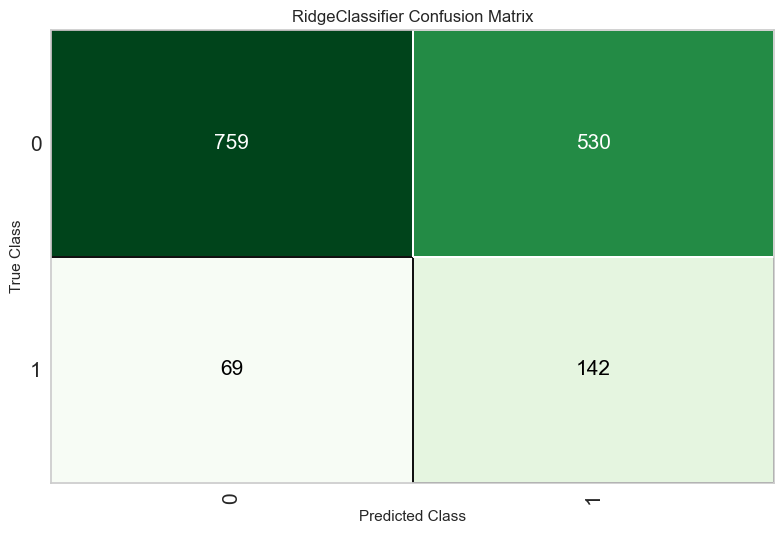

In [22]:
plot_model(tuned_ridge, plot='confusion_matrix')

In [23]:
preds = predict_model(tuned_ridge)

print(preds.head())

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.6007,0.6309,0.6730,0.2113,0.3216,0.1368,0.1830


      edad    segmento   saldo_total  numero_productos  visitas_app_mes  \
967     56  Preferente  39279.359375                 1                6   
2627    42    Estándar  10228.000000                 2                8   
3918    34  Preferente  19100.460938                 2               10   
2197    66    Estándar  21847.210938                 1                7   
4642    26     Premium  26143.560547                 1               10   

      usa_web  usa_tarjeta_credito  reclamos_6m  satisfaccion_encuesta  \
967         1                    0            1                    2.7   
2627        1                    1            3                    4.9   
3918        0                    0            0                    2.0   
2197        0                    0            0                    2.2   
4642        1                    1            0                    1.1   

      tasa_credito_personal rango_ingresos  region  cerrara_cuenta  \
967               46.000000       

In [24]:
preds.to_csv('predicciones_ridge.csv', index=False)

In [25]:
save_model(best_model, 'predcciones_final')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['edad', 'saldo_total',
                                              'numero_productos',
                                              'visitas_app_mes', 'usa_web',
                                              'usa_tarjeta_credito',
                                              'reclamos_6m',
                                              'satisfaccion_encuesta',
                                              'tasa_credito_personal'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_feature...
                  TransformerWrapper(exclude=None, include=None

CONCLUSIONES FINALES:
- El modelo que mejor funciono fue Ridge Classifier, que logro un AUC alrededor de 0.61, aunque no es un valor muy alto, ayuda a diferenciar con cierta precision a los clientes que pueden cerrar su cuenta y los que no.

- Las variables que mas influyen en el cierre de cuenta son la satisfaccion, el numero de productos y el uso digital, lo que muestra que los clientes menos activos y con baja satisfaccion son los que mas riesgo tienen de irse.

- El modelo sirve como una primera alerta para el negocio, aun puede mejorar, pero permite tomar decisiones mas rapidas para retener clientes sin esperar a que presenten reclamos.

PREGUNTAS:

1. ¿Cuál es el porcentaje de clientes que cerraron su cuenta? ¿Está balanceado el 
dataset?
En el dataset, alrededor del 23 % de los clientes cerraron su cuenta, mientras que el 77 % no lo hizo, esto significa que el conjunto de datos está desbalanceado, ya que hay muchos más clientes que permanecen que los que se van.

2. ¿Qué variables tienen mayor correlación con cerrara_cuenta?
En este caso son la satisfaccion en encuesta, el numero de productos y si usa tarjeta de credito, los clientes con menos productos y menor satisfaccion tienden a cerrar su cuenta.

3. ¿Cuál es el mejor modelo en AUC? ¿Y en Recall?
El mejor modelo en AUC fue Ridge Classifier (≈ 0.617), lo que muestra un buen equilibrio, en Recall, el que mejor recupera los casos de cierre fue similar, pero con resultados bajos, lo que indica que aun puede mejorar.

4. ¿Qué combinación de variables permite identificar clientes silenciosos que se van (sin reclamos)?
Los clientes silenciosos que se van sin reclamar suelen tener una satisfacción baja, pocos productos financieros, y bajo uso digital (pocas visitas a la app y no usan la web).
Una combinación de estas variables, por ejemplo: (satisfaccion_encuesta < 3) y (numero_productos <= 2) AND (visitas_app_mes < 5), permite detectar a quienes probablemente se irán sin avisar.

5. ¿Qué pasa si el modelo predice mal un cliente que no se iba (falso positivo)? ¿Y  uno que sí se iba (falso negativo)?
- Falso positivo: el modelo predice que el cliente cerrara su cuenta, pero no lo hace. En este caso, el banco podría gastar recursos innecesarios, como ofrecer descuentos o beneficios que no eran necesarios.
- Falso negativo: el modelo no detecta a un cliente que sí se iba. Esto es máá grave, porque la empresa pierde un cliente valioso sin haber tomado ninguna acción preventiva.

6. ¿Qué umbral de score (default 0.5 vs optimizado por KS) deberías usar para reducir la pérdida financiera?
El umbral de 0.5 puede no ser el mejor si los datos estan desbalanceados, porque trata igual a los que se van y a los que se quedan, usar un umbral optimizado por KS ayuda a separar mejor ambos grupos y reducir pérdidas financieras, ya que detecta más clientes que realmente podrían irse sin aumentar mucho los falsos positivos.

7. ¿Cómo explicarías con SHAP que un cliente Premium con buen saldo igual fue predicho como fuga?
Aunque un cliente premium con buen saldo parezca estable, el modelo puede predecirlo como fuga si su satisfacción es baja, usa poco los canales digitales, o tuvo varios reclamos recientes, el modelo no se guía solo por el dinero que tiene, sino por el comportamiento y señales de desinterés.

8. ¿Debería el modelo incluir la tasa de interés ofrecida como predictor, si luego esta puede cambiar según la política de retención?
No conviene usar la tasa de interés como variable del modelo, porque puede cambiar con las políticas del banco, si el modelo la usa como predictor y luego las tasas cambian, las predicciones dejarían de ser confiables, en ese casu seria mejor usar una versión promedio o histórica, si se quiere incluir.

9. ¿Cómo usarías este modelo en un sistema de reglas mixtas (modelo + regla de negocio) para que los gestores humanos no pierdan confianza?
El modelo puede funcionar junto con reglas simples de negocio, por ejemplo, si el modelo predice fuga y el cliente tiene saldo alto o es premium, se activa una alerta automática para que un gestor lo contacte, así el sistema apoya al equipo humano, sin reemplazarlo, y los gestores mantienen la confianza en las decisiones del modelo.